In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

1) DATA VERIFICATION & PROCESSING

In [461]:
df= pd.read_csv('USRealEstateTrends.csv')
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [462]:
print(df_cleaned.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'StateName', '2018-02-HomeValue',
       '2018-02-DaysPending', '2018-02-PriceCut', '2018-03-HomeValue',
       '2018-03-DaysPending', '2018-03-PriceCut',
       ...
       '2024-02-PriceCut', '2024-03-HomeValue', '2024-03-DaysPending',
       '2024-03-PriceCut', '2024-04-HomeValue', '2024-04-DaysPending',
       '2024-04-PriceCut', '2024-05-HomeValue', '2024-05-DaysPending',
       '2024-05-PriceCut'],
      dtype='object', length=232)


In [463]:
df_cleaned = df_cleaned.rename(columns=lambda col: col.replace("CutRaw", "PriceCut") if "CutRaw" in col else col)

In [464]:
print(df_cleaned.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'StateName', '2018-02-HomeValue',
       '2018-02-DaysPending', '2018-02-PriceCut', '2018-03-HomeValue',
       '2018-03-DaysPending', '2018-03-PriceCut',
       ...
       '2024-02-PriceCut', '2024-03-HomeValue', '2024-03-DaysPending',
       '2024-03-PriceCut', '2024-04-HomeValue', '2024-04-DaysPending',
       '2024-04-PriceCut', '2024-05-HomeValue', '2024-05-DaysPending',
       '2024-05-PriceCut'],
      dtype='object', length=232)


In [465]:
# Dictionary
city_summary = {}
cities = ['New York, NY', 'Miami, FL', 'Charlotte, NC']
# Loop through each city to calculate mean, summary, and quantity of data
for city in cities:
    city_data = df_cleaned[df_cleaned['RegionName'] == city]

    home_value_cols = [col for col in city_data.columns if 'HomeValue' in col]
    
    mean_home_value = city_data[home_value_cols].mean().mean()  
    
    summary_stats = city_data[home_value_cols].describe()
   
    quantity = city_data[home_value_cols].notna().sum().sum() 
    
    #RESULTS
    city_summary[city] = {
        'Mean Home Value': mean_home_value,
        'Quantity': quantity
    }

summary_df = pd.DataFrame(city_summary).T
print(summary_df)


               Mean Home Value  Quantity
New York, NY     551761.259918      76.0
Miami, FL        364189.163465      76.0
Charlotte, NC    298405.428273      76.0


In [466]:
print(df_cleaned['RegionName'].unique())

['United States' 'New York, NY' 'Los Angeles, CA' 'Chicago, IL'
 'Dallas, TX' 'Houston, TX' 'Washington, DC' 'Philadelphia, PA'
 'Miami, FL' 'Atlanta, GA' 'Boston, MA' 'Phoenix, AZ' 'San Francisco, CA'
 'Riverside, CA' 'Detroit, MI' 'Seattle, WA' 'Minneapolis, MN'
 'San Diego, CA' 'Tampa, FL' 'Denver, CO' 'Baltimore, MD' 'St. Louis, MO'
 'Orlando, FL' 'Charlotte, NC' 'San Antonio, TX' 'Portland, OR'
 'Sacramento, CA' 'Pittsburgh, PA' 'Cincinnati, OH' 'Austin, TX'
 'Las Vegas, NV' 'Kansas City, MO' 'Columbus, OH' 'Indianapolis, IN'
 'Cleveland, OH' 'San Jose, CA' 'Nashville, TN' 'Virginia Beach, VA'
 'Providence, RI' 'Jacksonville, FL' 'Milwaukee, WI' 'Oklahoma City, OK'
 'Raleigh, NC' 'Memphis, TN' 'Richmond, VA' 'Louisville, KY'
 'New Orleans, LA' 'Salt Lake City, UT' 'Hartford, CT' 'Buffalo, NY'
 'Birmingham, AL' 'Rochester, NY' 'Grand Rapids, MI' 'Tucson, AZ'
 'Urban Honolulu, HI' 'Tulsa, OK' 'Fresno, CA' 'Worcester, MA' 'Omaha, NE'
 'Bridgeport, CT' 'Greenville, SC' 'Albuquerque, N

In [467]:
df_cleaned[df_cleaned['RegionName'].str.contains('new york', case=False, na=False)]

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-PriceCut,2018-03-HomeValue,2018-03-DaysPending,2018-03-PriceCut,...,2024-02-PriceCut,2024-03-HomeValue,2024-03-DaysPending,2024-03-PriceCut,2024-04-HomeValue,2024-04-DaysPending,2024-04-PriceCut,2024-05-HomeValue,2024-05-DaysPending,2024-05-PriceCut
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.09994,51.0,26000.0,657279.223513,47.0,30000.0


In [468]:
df_cleaned[df_cleaned['RegionName'].str.contains('Charlotte', case=False, na=False)]


,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-PriceCut,2018-03-HomeValue,2018-03-DaysPending,2018-03-PriceCut,...,2024-02-PriceCut,2024-03-HomeValue,2024-03-DaysPending,2024-03-PriceCut,2024-04-HomeValue,2024-04-DaysPending,2024-04-PriceCut,2024-05-HomeValue,2024-05-DaysPending,2024-05-PriceCut
23,394458,23,"Charlotte, NC",NC,216161.401546,35.0,8400.0,217823.140728,30.0,9900.0,...,10000.0,382625.496534,31.0,10000.0,384749.010838,29.0,10000.0,386370.804768,28.0,10000.0
205,394459,212,"Charlottesville, VA",VA,297316.304015,62.0,10000.0,298885.449819,53.0,10000.0,...,19001.0,439172.811221,24.0,15000.0,442486.555282,23.0,17000.0,445589.867659,22.0,16000.0


In [469]:
df_cleaned[df_cleaned['RegionName'].str.contains('Miami', case=False, na=False)]


,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-PriceCut,2018-03-HomeValue,2018-03-DaysPending,2018-03-PriceCut,...,2024-02-PriceCut,2024-03-HomeValue,2024-03-DaysPending,2024-03-PriceCut,2024-04-HomeValue,2024-04-DaysPending,2024-04-PriceCut,2024-05-HomeValue,2024-05-DaysPending,2024-05-PriceCut
8,394856,8,"Miami, FL",FL,274876.172488,60.0,10000.0,276057.752522,61.0,10000.0,...,15000.0,486401.664815,67.0,14900.0,488391.399156,68.0,13000.0,490088.201516,69.0,14000.0
787,394855,817,"Miami, OK",OK,78969.143376,NaN,NaN,79808.105892,NaN,NaN,...,NaN,119048.853711,64.0,NaN,121064.145455,57.0,NaN,123090.695380,57.0,NaN


In [470]:
df_cleaned[df_cleaned['RegionName'].str.contains('New York', case=False, na=False)]


,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-PriceCut,2018-03-HomeValue,2018-03-DaysPending,2018-03-PriceCut,...,2024-02-PriceCut,2024-03-HomeValue,2024-03-DaysPending,2024-03-PriceCut,2024-04-HomeValue,2024-04-DaysPending,2024-04-PriceCut,2024-05-HomeValue,2024-05-DaysPending,2024-05-PriceCut
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.09994,51.0,26000.0,657279.223513,47.0,30000.0


In [471]:
# Filter for North Carolina (NC), New York (NY), and Florida (FL)
nc_cities = df_cleaned[df_cleaned['StateName'] == 'NC']
ny_cities = df_cleaned[df_cleaned['StateName'] == 'NY']
fl_cities = df_cleaned[df_cleaned['StateName'] == 'FL']

# Check if there are any cities found in each state
print(f"Cities in North Carolina (NC): {nc_cities.shape[0]}")
print(f"Cities in New York (NY): {ny_cities.shape[0]}")
print(f"Cities in Florida (FL): {fl_cities.shape[0]}")


Cities in North Carolina (NC): 37
Cities in New York (NY): 26
Cities in Florida (FL): 29


In [473]:
df_cleaned.isnull().sum()

RegionID                 0
SizeRank                 0
RegionName               0
StateName                1
2018-02-HomeValue        1
                      ... 
2024-04-DaysPending    177
2024-04-PriceCut       234
2024-05-HomeValue        0
2024-05-DaysPending    158
2024-05-PriceCut       174
Length: 232, dtype: int64

In [474]:
df_cleaned.dropna()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-PriceCut,2018-03-HomeValue,2018-03-DaysPending,2018-03-PriceCut,...,2024-02-PriceCut,2024-03-HomeValue,2024-03-DaysPending,2024-03-PriceCut,2024-04-HomeValue,2024-04-DaysPending,2024-04-PriceCut,2024-05-HomeValue,2024-05-DaysPending,2024-05-PriceCut
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0
5,394692,5,"Houston, TX",TX,208651.872272,51.0,10000.0,209394.157749,45.0,10000.0,...,10000.0,309138.260511,53.0,10000.0,310167.057071,47.0,10000.0,310706.915311,46.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,394955,479,"Palatka, FL",FL,106686.723888,64.0,10000.0,106721.670681,95.0,10000.0,...,10000.0,211000.189801,55.0,10000.0,213185.595995,86.0,10000.0,214949.862841,78.0,10000.0
476,394877,491,"Morehead City, NC",NC,262059.754953,78.0,10000.0,262803.655249,79.0,7050.0,...,12100.0,453796.905310,39.0,11500.0,455808.067846,49.0,15000.0,457672.048408,58.0,15000.0
504,394629,520,"Georgetown, SC",SC,229302.947359,77.0,8100.0,230281.137068,81.0,6000.0,...,10055.0,389546.746517,43.0,10500.0,392872.335776,68.0,10000.0,396124.409855,57.0,10000.0
544,394411,561,"Branson, MO",MO,143943.620254,75.0,9000.0,144769.591667,74.0,5100.0,...,5325.0,255085.380274,68.0,5500.0,255423.322460,67.0,10000.0,254828.419318,46.0,7000.0


In [475]:
df_cleaned.duplicated().sum()

0

In [477]:
# city = 'Charlotte, NC'
# city = 'Miami, FL'
# city = 'New York, NY'
home_value = 750000  

EACH CITY NEEDS TO BE CLEANED + ALIGNED W/ COLUMNS ALLOCATED

In [479]:
# Target vs. Current Search 
states = ['NC', 'FL', 'NY']
state_data = {}

# We only want the clean data
for state_name in states:
    # Filter by state
    state = df_cleaned[df_cleaned['StateName'] == state_name]
    
    #Confirmatioin of data
    if state.empty:
        print(f"No data available for the state: {state_name}")
        continue 

    
    state_data[state_name] = state['PriceCut']  

plt.figure(figsize=(10, 6))
sns.boxplot(data=list(state_data.values()), labels=state_data.keys(), palette='Set2')

plt.title('Price Distribution for Selected States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Price Cut (USD)', fontsize=12)
plt.grid(True)
plt.show()


KeyError: 'PriceCut'

NEED HOME VALUE

In [489]:
home_value_cols = [col for col in df_cleaned.columns if 'HomeValue' in col]
print(home_value_cols)  # Check the column names


['2018-02-HomeValue', '2018-03-HomeValue', '2018-04-HomeValue', '2018-05-HomeValue', '2018-06-HomeValue', '2018-07-HomeValue', '2018-08-HomeValue', '2018-09-HomeValue', '2018-10-HomeValue', '2018-11-HomeValue', '2018-12-HomeValue', '2019-01-HomeValue', '2019-02-HomeValue', '2019-03-HomeValue', '2019-04-HomeValue', '2019-05-HomeValue', '2019-06-HomeValue', '2019-07-HomeValue', '2019-08-HomeValue', '2019-09-HomeValue', '2019-10-HomeValue', '2019-11-HomeValue', '2019-12-HomeValue', '2020-01-HomeValue', '2020-02-HomeValue', '2020-03-HomeValue', '2020-04-HomeValue', '2020-05-HomeValue', '2020-06-HomeValue', '2020-07-HomeValue', '2020-08-HomeValue', '2020-09-HomeValue', '2020-10-HomeValue', '2020-11-HomeValue', '2020-12-HomeValue', '2021-01-HomeValue', '2021-02-HomeValue', '2021-03-HomeValue', '2021-04-HomeValue', '2021-05-HomeValue', '2021-06-HomeValue', '2021-07-HomeValue', '2021-08-HomeValue', '2021-09-HomeValue', '2021-10-HomeValue', '2021-11-HomeValue', '2021-12-HomeValue', '2022-01-Hom

In [491]:
years = sorted(set([col[:4] for col in df_cleaned.columns if 'HomeValue' in col]))

# EDA: 

In [494]:
df_cleaned = df.dropna()
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_numeric = df_cleaned[numeric_cols]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_numeric_cleaned = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned = df_cleaned.loc[df_numeric_cleaned.index]
print('Data Cleaning AS EXPECTED')

Data Cleaning AS EXPECTED


DATA ENTIRE POPULATION: HOME VALUE BOX-PLOT (display distribution of avg. home value 2018-2024

1) USING FOR-LOOP: We will need to take ONLY the home value columns for this distribution

In [498]:
# Extract the year format from column names (e.g., '2018', '2019', etc.)
years = sorted(set([col[:4] for col in df_cleaned.columns if 'HomeValue' in col]))

boxplot_data = []

for year in years:
    
    year_home_values = []
    for city_name in cities:
        city_data = df_cleaned[df_cleaned['RegionName'] == city_name]
        home_value_col = f"{year}-02-HomeValue"  
        if home_value_col in city_data.columns:
            year_home_values.append(city_data[home_value_col].values)
        else:
            year_home_values.append(np.nan) 

    boxplot_data.append(year_home_values)

2) var_name & value_name to paint a picture (easier use of dependent variable analysis)

3) color_map can be used: RED TO IDENTIFY HIGH PRICES & BLUE TO DEFINE LOWER PRICES

In [502]:
flat_home_values = [value for sublist in boxplot_data for value in sublist if not np.isnan(value)]
norm = Normalize(vmin=np.min(flat_home_values), vmax=np.max(flat_home_values))  
cmap = plt.get_cmap("coolwarm")  

# Mean home values since my cities weren't available but the data was useful
color_map = [ScalarMappable(norm=norm, cmap=cmap).to_rgba(np.mean(home_values)) for home_values in boxplot_data]

plt.figure(figsize=(14, 7))

###sns.boxplot generates color palette
sns.boxplot(data=boxplot_data, palette=color_map)

plt.xticks(ticks=range(len(years)), labels=years, rotation=45, fontsize=12)
plt.title('Distribution of Home Values Over Time by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Home Value (USD)', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\kerrj\AppData\Local\Temp\ipykernel_28580\2637339383.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  flat_home_values = [value for sublist in boxplot_data for value in sublist if not np.isnan(value)]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (21,) + inhomogeneous part.

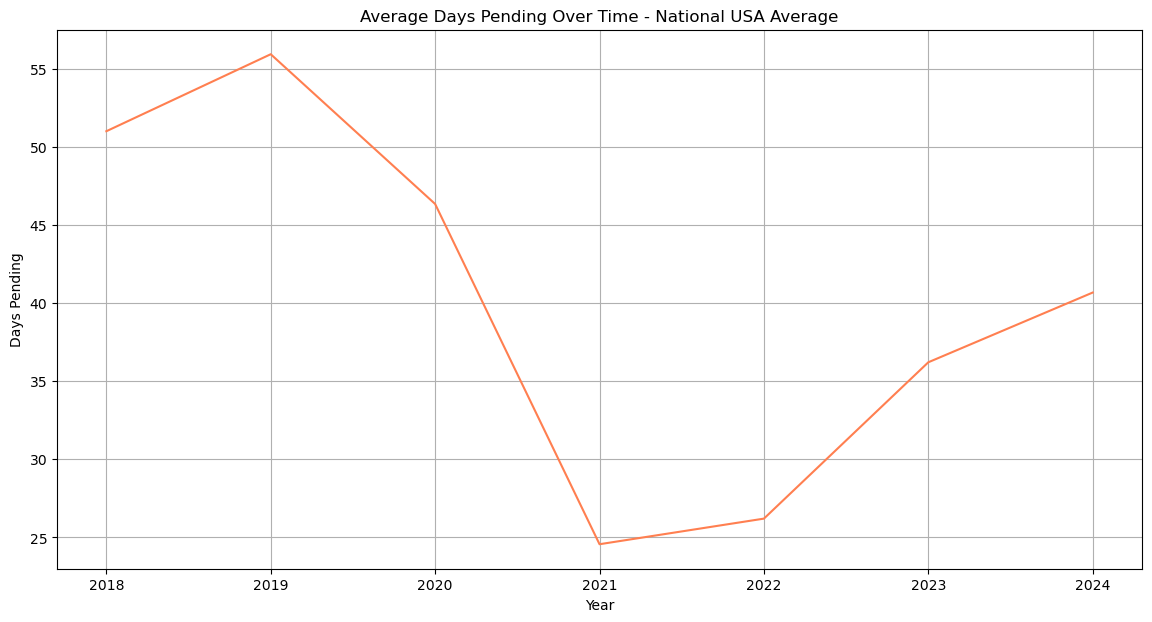

In [504]:
days_pending_cols = [col for col in df.columns if 'DaysPending' in col]
days_pending_mean = df_cleaned[days_pending_cols].mean()
days_pending_mean.index = [col[:4] for col in days_pending_mean.index]
days_pending_mean_by_year = days_pending_mean.groupby(days_pending_mean.index).mean()

plt.figure(figsize=(14, 7))
days_pending_mean_by_year.plot(color='coral')
plt.title('Average Days Pending Over Time - National USA Average')
plt.xlabel('Year')
plt.ylabel('Days Pending')
plt.grid(True)
plt.show()

In [506]:
home_values_cols = [col for col in df_cleaned.columns if 'HomeValue' in col]
home_values_mean = df_cleaned[home_values_cols].mean()
home_values_mean.index = [col[:4] for col in home_values_mean.index]

home_values_mean_by_year = home_values_mean.groupby(home_values_mean.index).mean()

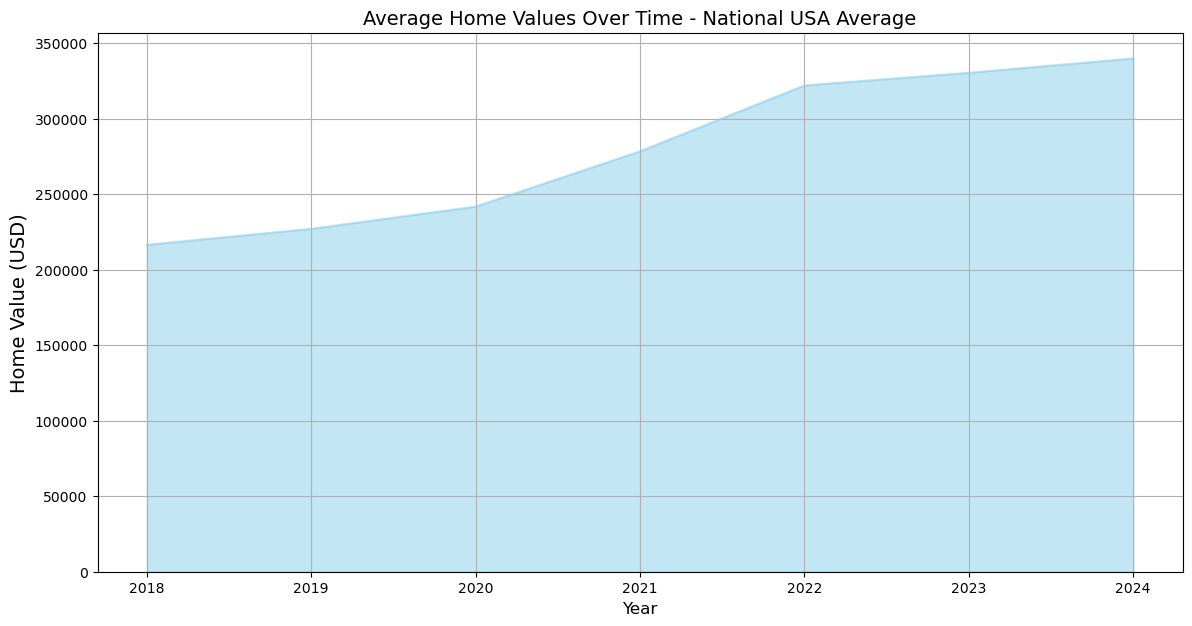

In [508]:

plt.figure(figsize=(14, 7))
home_values_mean_by_year.plot(kind='area', color='skyblue', alpha=0.5)

plt.title('Average Home Values Over Time - National USA Average', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Home Value (USD)', fontsize=14)
plt.grid(True)
plt.show()
